In [1]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt

Create pseudo-analytic solution to compare with

Make a grid of points in the source region

In [2]:
xy = np.mgrid[0:1:0.01, 0:1:0.01].reshape(2,-1).T

In [3]:
xy.shape

(10000, 2)

Make a grid of points corresponding to the top row

In [4]:
toprow = np.array([[6.0, y] for y in np.linspace(0, 6, 6000)])

In [5]:
toprow.shape

(6000, 2)

Calculate the distance (in units of mean free paths) from every point in the source region to every point along the top row

In [6]:
dists = cdist(toprow, xy)

Estimate the contribution to the flux at each point $t_i$ on the top row from each point $p_j$ in the source region, $p$ as $$\psi(t_i)=S(p_j)\frac{\mathrm{e}^{-d_{ij}}}{d_{ij}^2}$$

In [7]:
cont = (1 / xy.shape[0]) * np.exp(-dists)*(dists**-2)

In [8]:
cont.shape

(6000, 10000)

Add all of these contributions together and normalize the total to 1.0 (since we are only interested in the shape)

In [9]:
f = np.sum(cont, axis=1)
f /= np.sum(f) / 6000

Load the quadrature calculated by the `test02.class` file (and normalize that total to 1.0)

In [10]:
j = np.loadtxt('no5resb.txt')
j /= np.sum(j) / 6000

In [11]:
k = np.loadtxt('no5res.txt')
k /= np.sum(k) / 6000

Compare the two results graphically

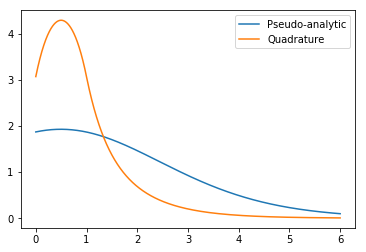

In [12]:
x = np.linspace(0, 6, f.shape[0])
plt.plot(x, f, label='Pseudo-analytic')
plt.plot(x, j, label='Quadrature')
#plt.plot(x, k, label='Old Quadrature')
plt.legend(loc='best')
plt.savefig('no5result.png', dpi=1000)